In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [2]:
data_location = "heart.csv"
data = pd.read_csv(data_location)
data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


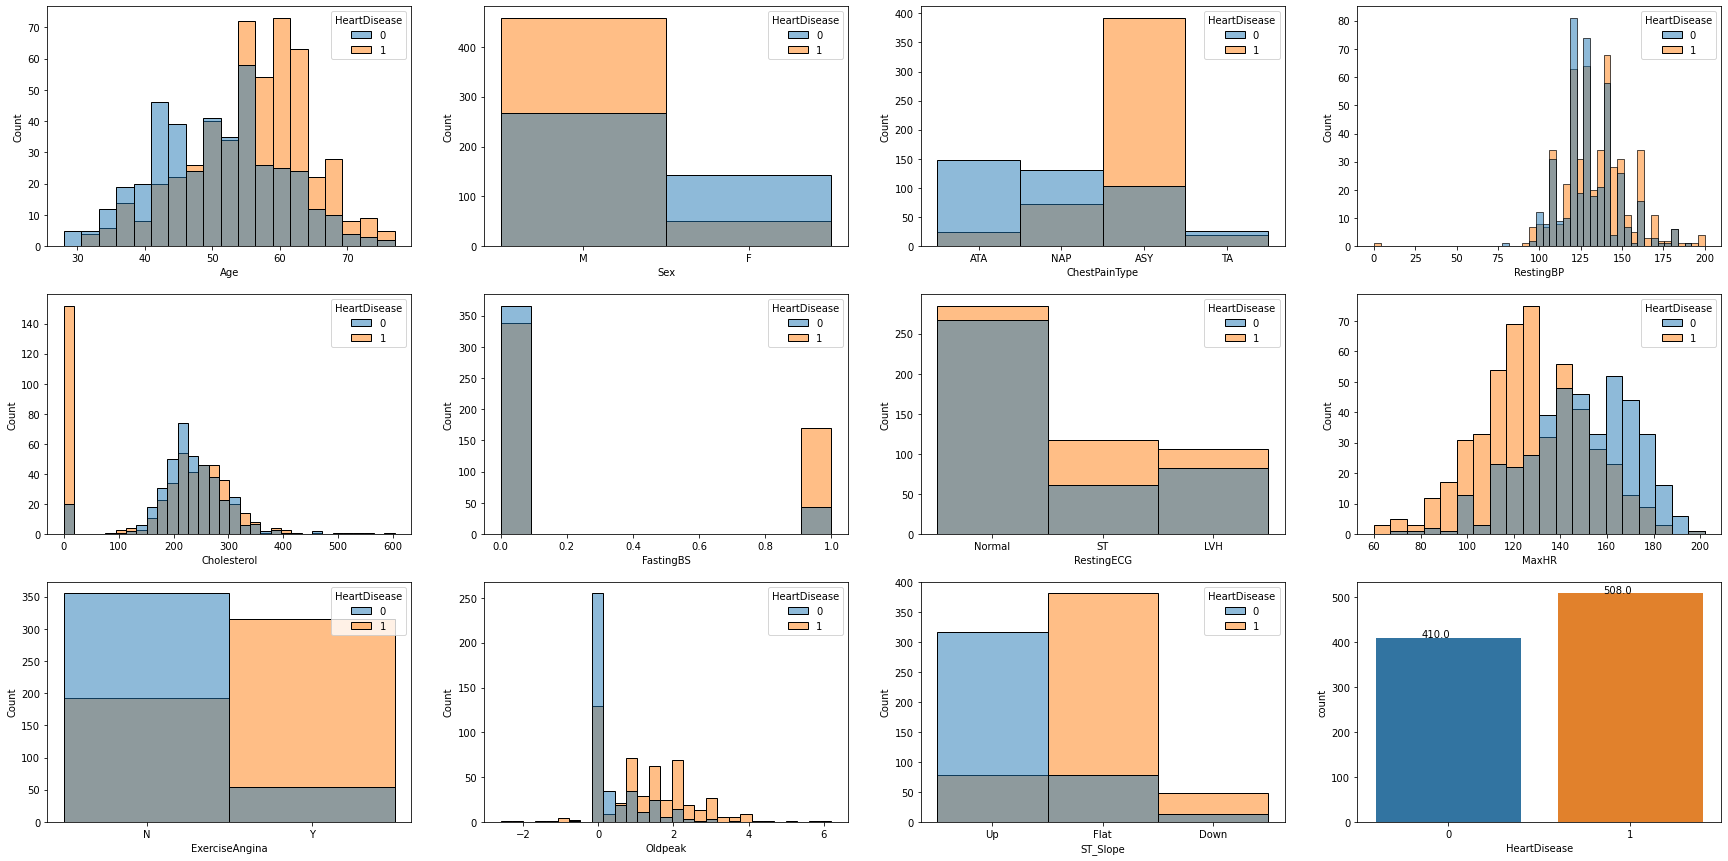

In [3]:
fig, axs = plt.subplots(3, 4,figsize=(30,15))

sns.histplot(data=data, x="Age", hue="HeartDisease", ax=axs[0,0])
sns.histplot(data=data, x="Sex", hue="HeartDisease", ax=axs[0,1])
sns.histplot(data=data, x="ChestPainType", hue="HeartDisease", ax=axs[0,2])
sns.histplot(data=data, x="RestingBP", hue="HeartDisease", ax=axs[0,3])
sns.histplot(data=data, x="Cholesterol", hue="HeartDisease", ax=axs[1,0])
sns.histplot(data=data, x="FastingBS", hue="HeartDisease", ax=axs[1,1])
sns.histplot(data=data, x="RestingECG", hue="HeartDisease", ax=axs[1,2])
sns.histplot(data=data, x="MaxHR", hue="HeartDisease", ax=axs[1,3])
sns.histplot(data=data, x="ExerciseAngina", hue="HeartDisease", ax=axs[2,0])
sns.histplot(data=data, x="Oldpeak", hue="HeartDisease", ax=axs[2,1])
sns.histplot(data=data, x="ST_Slope", hue="HeartDisease", ax=axs[2,2])
sns.countplot(data=data, x="HeartDisease", ax=axs[2,3])

for p in axs[2,3].patches:
       axs[2,3].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
                                                 

In [4]:
#Eliminando los datos con colesterol en 0 el dataset queda equilibrado por lo tanto avanzamos con su limpieza.
data[data.Cholesterol==0].HeartDisease.value_counts()

1    152
0     20
Name: HeartDisease, dtype: int64

In [5]:
data[data.Oldpeak<0].HeartDisease.value_counts()

1    9
0    4
Name: HeartDisease, dtype: int64

In [6]:
data = data[data.Cholesterol!=0]
data = data[data.Oldpeak>=0]

In [7]:
data = pd.get_dummies(data, drop_first=True)

In [8]:
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


## Se define variable target (HeartDisease) y features

In [9]:
y = data.HeartDisease
X = data.drop(columns=['HeartDisease'])

La hipotesis nula seria el valor con mayor repiticion.

In [10]:
y.value_counts(normalize=True)

0    0.522148
1    0.477852
Name: HeartDisease, dtype: float64

Separamos el dataset de entrenamiento.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

## Creamos un modelo de Naive Bayes para probar inicialmente. A propósito no estandarizamos para que el modelo no arroje error.

In [12]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [13]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.8128342245989305

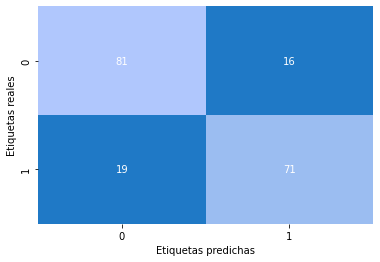

In [14]:
myColors = ((0, 0.40, 0.75, 0.88), (0.15, 0.60, 0.50, 0.8), (0.15, 0.40, 0.99, 0.36))
cmap = LinearSegmentedColormap.from_list('Custom', myColors,10)
cm = confusion_matrix(y_test, y_pred)
axis_labels = np.sort(y.unique())
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

Obtuvimos un buen resultado inicial y vamos a continuar con otros modelos.

## Estandarizo las features

In [15]:
scaler=StandardScaler();

X_sc=scaler.fit_transform(X);

In [16]:
X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y, random_state=20)

# Pruebo con un modelo de bayes estandarizando las features. Los valores negativos me rompen el modelo. Observar el error

In [17]:
model = MultinomialNB()
model.fit(X_sc_train, y_train)

ValueError: Negative values in data passed to MultinomialNB (input X)

## El siguiente a aplicar sera KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
scaler=StandardScaler();

X_sc=scaler.fit_transform(X);

In [ ]:
# Ajustamos a los datos de entrenamiento.
knn.fit(X_sc_train, y_train);

# Predecimos etiquetas para los datos de test.
y_pred = knn.predict(X_sc_test)
accuracy_score(y_test, y_pred).round(2)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
axis_labels = np.sort(y.unique())
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

## Por último probaremos con Regresion logistica.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

In [ ]:
logistic_regression = LogisticRegression(penalty='none') # sin regularización
logistic_regression.fit(X_train, y_train);
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred).round(2)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
axis_labels = np.sort(y.unique())
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

La logistica no obtuvo resultados favorables.

### Como el que mejor resultados preliminares dio fue KNN decidimos avanzar con este y realizar GridSearch y CV para ver que tanto podemos mejorarlo y analizar las medidas de evaluación del modelo (el objetivo principal es reducir los falsos negativos, porque se trata de una enfermedad cardiaca).

In [ ]:
folds=StratifiedKFold(n_splits=5, shuffle=True) 
k_range = list(range(1, 15))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)

In [ ]:
grid = GridSearchCV(knn, param_grid, cv=folds, scoring='recall')
grid.fit(X_sc_train, y_train)

In [ ]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

In [ ]:
y_pred = grid.predict(X_sc_test)
accuracy_score(y_test, y_pred)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
axis_labels = np.sort(y.unique())
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');